In [3]:
# imports
import os
import json
import pprint
import pandas as pd

# constants
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(CURRENT_DIR, 'data'))
MOJO_DIR = os.path.join(DATA_DIR, 'boxofficemojo')
metacritic_DIR = os.path.join(DATA_DIR, 'metacritic')

##LOADING DATA

In [4]:
def load_mojo_data():
    file_contents = os.listdir(MOJO_DIR)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(MOJO_DIR, filename)

        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)

        movie_list.append(movie_data)

    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

def load_metacritic_data():
    file_contents = os.listdir(metacritic_DIR)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(metacritic_DIR, filename)
        
        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)
        if type(movie_data)==dict:
            movie_list.append(movie_data)

    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

In [5]:
import loaddata_prod
import pandas as pd
movie_dicts_mojo = loaddata_prod.load_mojo_data()
movie_df_mojo = pd.DataFrame(movie_dicts_mojo)
movie_dicts_meta = load_metacritic_data()
movie_df_meta = pd.DataFrame(movie_dicts_meta)

Parsed 3728 movies from 3728 files
Parsed 4765 movies from 4767 files


In [6]:
#clean title

#metacric_df2['title']=metacric_df2.title_Upper.str.strip() 
#movie_df_meta.drop('unable to retrieve', axis=1, inplace=True) 
#metacric_df1=metacric_df.drop(metacric_df.index[[4764]]) 
movie_df_meta['title_Upper']=movie_df_meta.title.str.upper() 
movie_df_meta['title_new']=movie_df_meta.title_Upper.str.replace(r'\W+','',case=False)
movie_df_mojo['title_Upper']=movie_df_mojo.title.str.upper() 
movie_df_mojo['title_new']=movie_df_mojo.title_Upper.str.replace(r'\W+','',case=False)

In [7]:
#clean director
movie_df_meta['director_upper']=movie_df_meta.director.str.upper() 
movie_df_meta['director_new']=movie_df_meta.director_upper.str.replace(r'\W+','',case=False)
movie_df_mojo['director_upper']=movie_df_mojo.director.str.upper() 
movie_df_mojo['director_new']=movie_df_mojo.director_upper.str.replace(r'\W+','',case=False)

In [8]:

#Clean year
movie_df_mojo['year']=pd.to_numeric(movie_df_mojo['year'])
movie_df_meta['year']=pd.to_numeric(movie_df_meta['year'])

In [18]:

# Join based on title and Year
movie_merge= pd.merge(movie_df_mojo,movie_df_meta, on=['title_new', 'year'], how="inner")

In [177]:
#check for duplicates
#movie_merge[movie_merge.duplicated(['title_new'])][['director_x','director_new_x','director_y']]
# clean_movie_df_dir = movie_df_dir[related_columns].dropna()

,director_x,director_new_x,director_y


In [202]:
data_description=movie_merge.describe()
data_description.to_csv('./data_description.csv')

In [10]:
#### JH Add

In [11]:
movie_merge

,alt_title,director_x,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title_x,...,rating,release_date,runtime_minutes,studio,title_y,unable to retrieve,user_score,title_Upper_y,director_upper_y,director_new_y
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",...,PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6,"10,000 BC",ROLAND EMMERICH,ROLANDEMMERICH
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,...,G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3,102 DALMATIANS,KEVIN LIMA,KEVINLIMA
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,...,PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7,10 THINGS I HATE ABOUT YOU,GIL JUNGER,GILJUNGER
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,...,R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6,10 YEARS,JAMIE LINDEN,JAMIELINDEN
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,...,Not Rated,2013-02-22,110.0,First Run Features,11 Flowers,NaN,tbd,11 FLOWERS,XIAOSHUAI WANG,XIAOSHUAIWANG
5,The 11th Hour (2007),None,707343.0,11thhour,15213.0,60853.0,NaN,None,2007-08-17,The 11th Hour,...,PG,2007-08-17,95.0,Warner Independent Pictures (WIP),The 11th Hour,NaN,6.5,THE 11TH HOUR,LEILA CONNERS,LEILACONNERS
6,127 Hours (2010),Danny Boyle,18335230.0,127hours,2333.0,2136801.0,18000000.0,2010-11-05,2011-01-28,127 Hours,...,R,2010-11-05,94.0,Fox Searchlight Pictures,127 Hours,NaN,8,127 HOURS,DANNY BOYLE,DANNYBOYLE
7,12 Rounds (2009),Renny Harlin,12234694.0,12rounds,2286.0,5329240.0,NaN,None,2009-03-27,12 Rounds,...,PG-13,2009-03-27,108.0,Fox Atomic,12 Rounds,NaN,5,12 ROUNDS,RENNY HARLIN,RENNYHARLIN
8,13 Assassins (2011),None,802778.0,13assassins,11464.0,45854.0,NaN,None,2011-04-29,13 Assassins,...,R,2011-04-29,141.0,Magnet Releasing,13 Assassins,NaN,7.9,13 ASSASSINS,TAKASHI MIIKE,TAKASHIMIIKE
9,13 Going on 30 (2004),Gary Winick,57231747.0,13goingon30,6123.0,21054283.0,37000000.0,None,2004-04-23,13 Going on 30,...,PG-13,2004-04-23,98.0,Columbia Pictures,13 Going on 30,NaN,6.9,13 GOING ON 30,GARY WINICK,GARYWINICK


In [19]:
movie_merge.loc[movie_merge['user_score'] == 'tbd', 'user_score'] = None

In [20]:
movie_merge.user_score = movie_merge.user_score.astype(float)

In [21]:
movie_merge

,alt_title,director_x,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title_x,...,rating,release_date,runtime_minutes,studio,title_y,unable to retrieve,user_score,title_Upper_y,director_upper_y,director_new_y
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",...,PG-13,2008-03-07,109.0,Warner Bros. Pictures,"10,000 BC",NaN,4.6,"10,000 BC",ROLAND EMMERICH,ROLANDEMMERICH
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,...,G,2000-11-22,100.0,Buena Vista Pictures,102 Dalmatians,NaN,5.3,102 DALMATIANS,KEVIN LIMA,KEVINLIMA
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,...,PG-13,1999-03-31,97.0,Buena Vista Pictures,10 Things I Hate About You,NaN,7.0,10 THINGS I HATE ABOUT YOU,GIL JUNGER,GILJUNGER
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,...,R,2012-09-14,100.0,Anchor Bay Entertainment,10 Years,NaN,6.6,10 YEARS,JAMIE LINDEN,JAMIELINDEN
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,...,Not Rated,2013-02-22,110.0,First Run Features,11 Flowers,NaN,NaN,11 FLOWERS,XIAOSHUAI WANG,XIAOSHUAIWANG
5,The 11th Hour (2007),None,707343.0,11thhour,15213.0,60853.0,NaN,None,2007-08-17,The 11th Hour,...,PG,2007-08-17,95.0,Warner Independent Pictures (WIP),The 11th Hour,NaN,6.5,THE 11TH HOUR,LEILA CONNERS,LEILACONNERS
6,127 Hours (2010),Danny Boyle,18335230.0,127hours,2333.0,2136801.0,18000000.0,2010-11-05,2011-01-28,127 Hours,...,R,2010-11-05,94.0,Fox Searchlight Pictures,127 Hours,NaN,8.0,127 HOURS,DANNY BOYLE,DANNYBOYLE
7,12 Rounds (2009),Renny Harlin,12234694.0,12rounds,2286.0,5329240.0,NaN,None,2009-03-27,12 Rounds,...,PG-13,2009-03-27,108.0,Fox Atomic,12 Rounds,NaN,5.0,12 ROUNDS,RENNY HARLIN,RENNYHARLIN
8,13 Assassins (2011),None,802778.0,13assassins,11464.0,45854.0,NaN,None,2011-04-29,13 Assassins,...,R,2011-04-29,141.0,Magnet Releasing,13 Assassins,NaN,7.9,13 ASSASSINS,TAKASHI MIIKE,TAKASHIMIIKE
9,13 Going on 30 (2004),Gary Winick,57231747.0,13goingon30,6123.0,21054283.0,37000000.0,None,2004-04-23,13 Going on 30,...,PG-13,2004-04-23,98.0,Columbia Pictures,13 Going on 30,NaN,6.9,13 GOING ON 30,GARY WINICK,GARYWINICK


In [22]:
movie_merge['user_score'].mean()

6.832740879326461

In [24]:
print len(movie_merge.dropna(subset=['user_score']))

3207


In [25]:
movie_merge.plot.scatter('user_score','domestic_gross' )

In [27]:
import statsmodels.api as sm

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

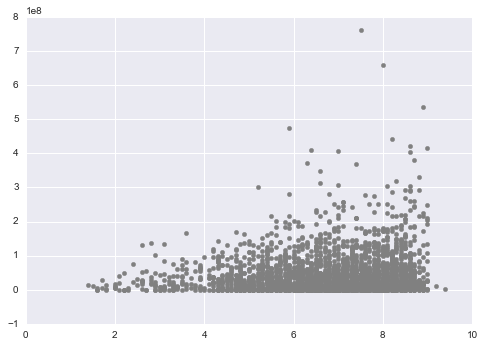

In [29]:
plt.scatter(movie_merge.user_score, movie_merge.domestic_gross, color='gray')

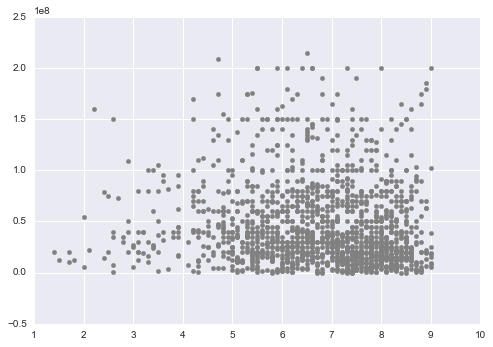

In [30]:
plt.scatter(movie_merge.user_score, movie_merge.production_budget, color='gray')

In [35]:
movie_merge_nona = movie_merge.dropna(subset=['user_score', 'domestic_gross'])

In [36]:
Y = movie_merge_nona.domestic_gross
X = sm.add_constant(movie_merge_nona.user_score)

linmodel = sm.OLS(Y,X).fit()

In [37]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     20.57
Date:                Thu, 12 May 2016   Prob (F-statistic):           5.95e-06
Time:                        16:44:34   Log-Likelihood:                -61325.
No. Observations:                3177   AIC:                         1.227e+05
Df Residuals:                    3175   BIC:                         1.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.562e+07   5.24e+06      2.984      0.003      5.36e+06  2.59e+07
user_score  3.402e+06    7.5e+05      4.536      0.000      1.93e+06  4.87e+06
==============================================================================
Omnibus:                     2352.268   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56260.194
Skew:                           3.286   Prob(JB):                         0.00
Kurtosis:                      22.540   Cond. No.                         35.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
movie_merge_nona.production_budget = movie_merge.dropna(subset=['user_score', 'domestic_gross'])

In [38]:
movie_merge_nona=movie_merge_nona.fillna(movie_merge_nona.mean())

In [39]:
Y = movie_merge_nona.domestic_gross
X = sm.add_constant(movie_merge_nona.production_budget)

linmodel2 = sm.OLS(Y,X).fit()

In [40]:
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     649.0
Date:                Thu, 12 May 2016   Prob (F-statistic):          2.05e-130
Time:                        16:54:26   Log-Likelihood:                -61040.
No. Observations:                3177   AIC:                         1.221e+05
Df Residuals:                    3175   BIC:                         1.221e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             -1.183e+06   1.84e+06     -0.644      0.520     -4.78e+06  2.42e+06
production_budget     0.8562      0.034     25.475      0.000         0.790     0.922
==============================================================================
Omnibus:                     2277.293   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57633.731
Skew:                           3.105   Prob(JB):                         0.00
Kurtosis:                      22.920   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""